In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
np.random.seed(22)

In [480]:
means = [[2, 2], [4, 2]]
cov = [[.3, .2], [.2, .3]]
N = 45
X0 = np.random.multivariate_normal(means[0], cov, N).T
X1 = np.random.multivariate_normal(means[1], cov, N).T

In [481]:
X = np.concatenate((X0, X1), axis = 1)  
Y = np.concatenate((np.ones((1, N)), -1*np.ones((1, N))), axis = 1)
X_bar = np.concatenate((np.ones((1, 2*N)), X), axis = 0)

In [477]:
def perceptron(x_bar, y, w_init):
    w = [w_init]
    N = x_bar.shape[1]
    dim = X_bar.shape[0]
    mis_points = []
    epochs = 0

    while True:
        epochs += 1
        id = np.random.permutation(N)
        for i in range(N):
            xi = x_bar[:,id[i]].reshape(dim, 1)
            yi = y[:,id[i]]
            if np.sign(w[-1].dot(xi)) != yi:
                mis_points.append(id[i])
                w.append(w[-1] + yi*xi.T)
        if np.array_equal(np.sign(w[-1].dot(x_bar)), y):
            break
    return w, mis_points, epochs


In [482]:
dim = X_bar.shape[0]
w_init = np.random.randn(1,dim)

w, mis_points, epochs = perceptron(X_bar, Y, w_init)
w[-1]

array([[ 3.13512809, -4.92262345,  5.49427444]])

MovieWriter imagemagick unavailable; using Pillow instead.


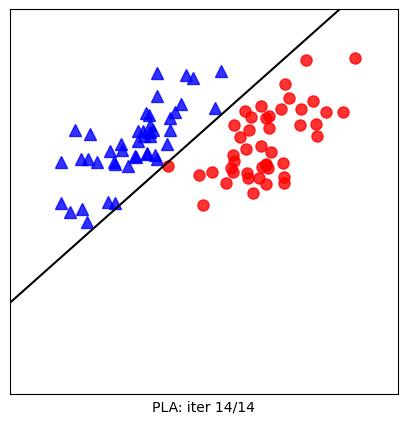

In [483]:
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation 

def visualization(x_bar, w, mis_points):
    it = len(w)    
       
    fig, ax = plt.subplots(figsize=(5, 5))  

    x0, x1 = x_bar[1:3, 0:N], x_bar[1:3, N:2*N]

    def draw_line(w):
        w0, w1, w2 = w[:,0], w[:,1], w[:,2]
        if w2 != 0:
            x11, x12 = -100, 100
            return plt.plot([x11, x12], [-(w1*x11 + w0)/w2, -(w1*x12 + w0)/w2], 'k')
        else:
            x10 = -w0/w1
            return plt.plot([x10, x10], [-100, 100], 'k')
    
    def update(i):
        ani = plt.cla()
        #points
        ani = plt.plot(x0[0, :], x0[1, :], 'b^', markersize = 8, alpha = .8)
        ani = plt.plot(x1[0, :], x1[1, :], 'ro', markersize = 8, alpha = .8)
        ani = plt.axis([0 , 6, -2, 4])
        i2 =  i if i < it else it-1
        ani = draw_line(w[i2])
        if i < it-1:
            circle = plt.Circle((x_bar[1, mis_points[i]], x_bar[2, mis_points[i]]), 0.15, color='k', fill = False)
            ax.add_artist(circle)
        # hid axis 
        cur_axes = plt.gca()
        cur_axes.axes.get_xaxis().set_ticks([])
        cur_axes.axes.get_yaxis().set_ticks([])

        label = 'PLA: iter %d/%d' %(i2, it-1)
        ax.set_xlabel(label)
        return ani, ax 
        
    anim = FuncAnimation(fig, update, frames=np.arange(0, it + 3), interval=1000)
    anim.save('PLA.gif', dpi = 100, writer = 'imagemagick')
    plt.show()

visualization(X_bar, w, mis_points)

In [166]:
from sklearn.linear_model import Perceptron
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [209]:
X_dataset, Y_dataset = make_classification(n_samples=30, n_features=2, n_informative=2, n_redundant=0, random_state=1)
x_train, x_test, y_train, y_test = train_test_split(X_dataset, Y_dataset, stratify=Y_dataset, test_size=1/3, random_state=1)

In [497]:
x_train, x_test, y_train, y_test = train_test_split(X_bar.T, Y[0,:], stratify=Y[0,:], test_size=0.2, random_state=1)
print('Training size: ', y_train.shape[0])
print('Testing size: ', y_test.shape[0])
print('')

PLA_model = Perceptron(tol=1e-6, early_stopping=True, random_state=1, verbose=1).fit(x_train, y_train)
print('')
print('The retrieved coefficients from the sklearn library model: w = [%.2f, %.2f, %.2f] and the accuracy score: %.2f' %(PLA_model.coef_[:,0], PLA_model.coef_[:,1], PLA_model.coef_[:,2], PLA_model.score(x_test, y_test)))

dim = x_train.T.shape[0]
w_init = np.random.randn(1,dim)
w, mis_points, epochs = perceptron(x_train.T, np.array([y_train]), w_init)
PLA_model.coef_ = w[-1]
print('The retrieved coefficients from the manually built model: w = [%.2f, %.2f, %.2f] and the accuracy score: %.2f' %(PLA_model.coef_[:,0], PLA_model.coef_[:,1], PLA_model.coef_[:,2], PLA_model.score(x_test, y_test)))

Training size:  72
Testing size:  18

-- Epoch 1
Norm: 4.62, NNZs: 3, Bias: 1.000000, T: 64, Avg. loss: 0.893566
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 4.62, NNZs: 3, Bias: 1.000000, T: 128, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 4.62, NNZs: 3, Bias: 1.000000, T: 192, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 4.62, NNZs: 3, Bias: 1.000000, T: 256, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 4.62, NNZs: 3, Bias: 1.000000, T: 320, Avg. loss: 0.000000
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 4.62, NNZs: 3, Bias: 1.000000, T: 384, Avg. loss: 0.000000
Total training time: 0.01 seconds.
Convergence after 6 epochs took 0.01 seconds

The retrieved coefficients from the sklearn library model: w = [1.00, -3.12, 3.26] and the accuracy score: 1.00
The retrieved coefficients from the manually built model: w = [1.73, -3.26, 3.65] and the accuracy score: 1.00
